Starting the search for N...
N = 100, Current max error = 6.4628e-06
N = 200, Current max error = 3.8703e-07
N = 300, Current max error = 7.7115e-08
N = 400, Current max error = 2.4471e-08
N = 500, Current max error = 8.8044e-09
N = 600, Current max error = 4.7316e-09
N = 700, Current max error = 2.5920e-09
N = 800, Current max error = 1.4067e-09
N = 900, Current max error = 9.3805e-10
N = 1000, Current max error = 3.5186e-10
N = 1100, Current max error = 4.2188e-10
N = 1200, Current max error = 3.0086e-10
N = 1300, Current max error = 2.1183e-10
N = 1400, Current max error = 1.5888e-10
N = 1500, Current max error = 1.0856e-10

-------------------------------------------
Calculation finished! Total time: 0.42 seconds
The minimum N found is: 1574
Corresponding number of nodes (N+1) is: 1575
The maximum error is: 9.9611e-11 (which is less than 1e-10)
-------------------------------------------



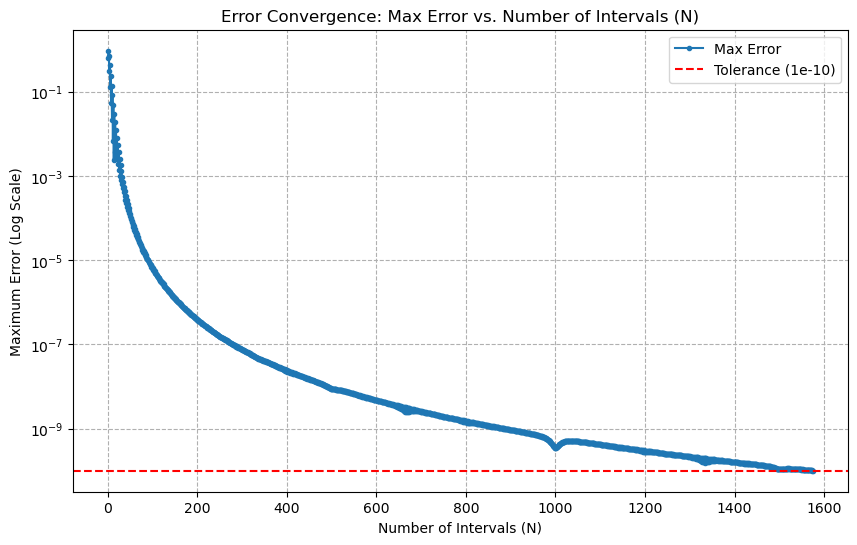

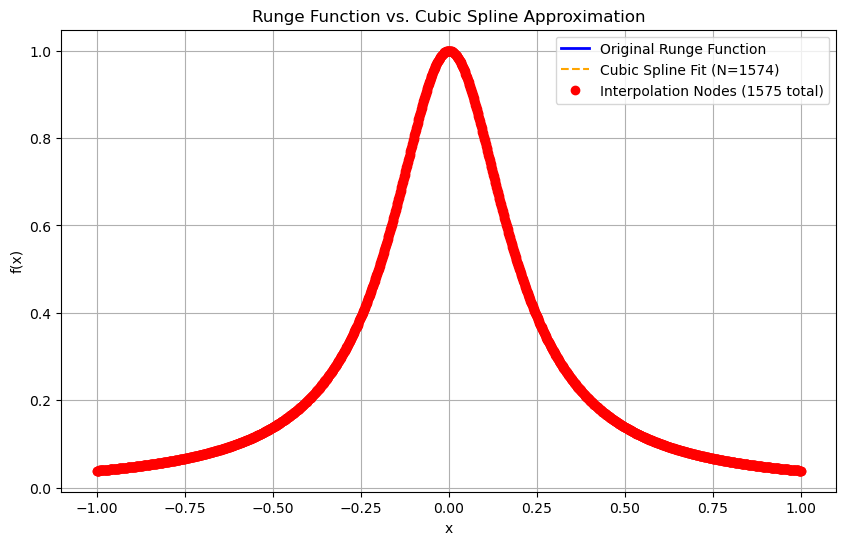

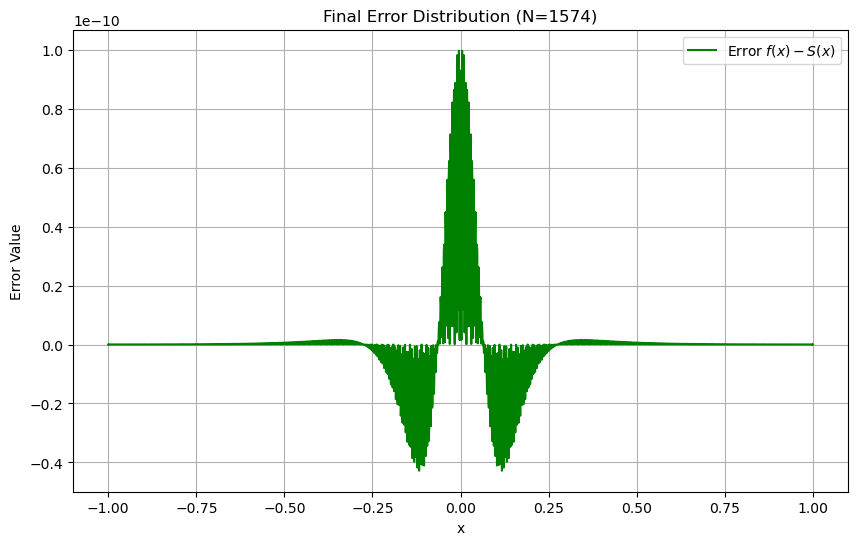

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import time

def runge(x):
    return 1 / (1 + 25 * x**2)

tol = 1e-10
N = 1
N_values = []
error_values = []

print("Starting the search for N...")
start_time = time.time()

while True:
    x_nodes = np.linspace(-1, 1, N + 1)
    y_nodes = runge(x_nodes)
    
    cs = CubicSpline(x_nodes, y_nodes, bc_type='not-a-knot')
    
    x_test = np.linspace(-1, 1, 2000)
    y_true = runge(x_test)
    y_pred = cs(x_test)
    
    error = np.max(np.abs(y_true - y_pred))
    
    N_values.append(N)
    error_values.append(error)
    
    if N % 100 == 0:
        print(f"N = {N}, Current max error = {error:.4e}")

    if error < tol:
        break
    
    N += 1

end_time = time.time()

print("\n-------------------------------------------")
print(f"Calculation finished! Total time: {end_time - start_time:.2f} seconds")
print(f"The minimum N found is: {N}")
print(f"Corresponding number of nodes (N+1) is: {N + 1}")
print(f"The maximum error is: {error:.4e} (which is less than {tol})")
print("-------------------------------------------\n")

final_x_nodes = np.linspace(-1, 1, N + 1)
final_y_nodes = runge(final_x_nodes)
final_cs = CubicSpline(final_x_nodes, final_y_nodes, bc_type='not-a-knot')
final_x_test = np.linspace(-1, 1, 2000)
final_y_true = runge(final_x_test)
final_y_pred = final_cs(final_x_test)
final_error_dist = final_y_true - final_y_pred

plt.figure(figsize=(10, 6))
plt.semilogy(N_values, error_values, '-o', markersize=3, label='Max Error')
plt.axhline(y=tol, color='r', linestyle='--', label=f'Tolerance ({tol})')
plt.title('Error Convergence: Max Error vs. Number of Intervals (N)')
plt.xlabel('Number of Intervals (N)')
plt.ylabel('Maximum Error (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(final_x_test, final_y_true, label='Original Runge Function', color='blue', linewidth=2)
plt.plot(final_x_test, final_y_pred, label=f'Cubic Spline Fit (N={N})', color='orange', linestyle='--')
plt.plot(final_x_nodes, final_y_nodes, 'ro', label=f'Interpolation Nodes ({N+1} total)')
plt.title('Runge Function vs. Cubic Spline Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(final_x_test, final_error_dist, label='Error $f(x) - S(x)$', color='green')
plt.title(f'Final Error Distribution (N={N})')
plt.xlabel('x')
plt.ylabel('Error Value')
plt.grid(True)
plt.legend()
plt.show()